/home/exouser/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


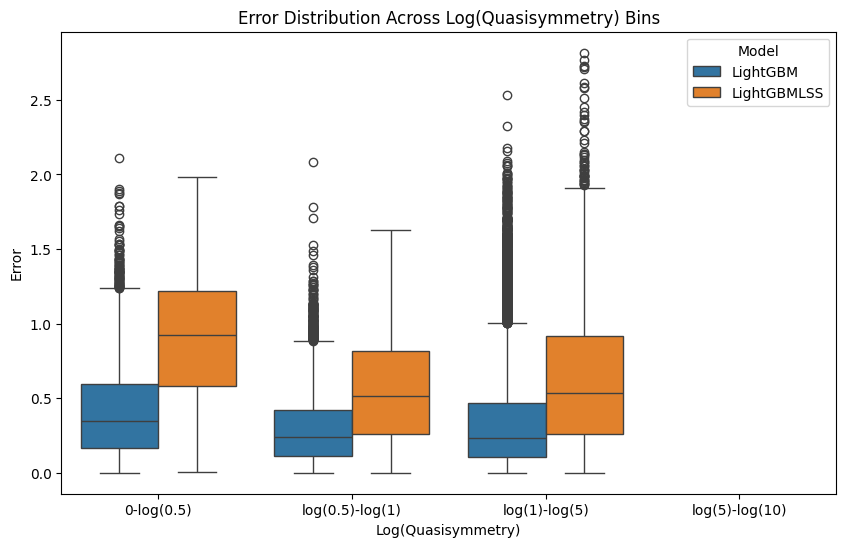

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the errors data
df_lgbm = pd.read_csv('errors_lgbm.csv')
df_lgblss = pd.read_csv('errors_lgblss.csv')

# Merge the DataFrames
df = pd.merge(df_lgbm, df_lgblss, on='quasisymmetry')

# Log-transform quasisymmetry values for bins
log_bins = np.log([0.0001, 0.5, 1, 5, 10])
log_labels = ['0-log(0.5)', 'log(0.5)-log(1)', 'log(1)-log(5)', 'log(5)-log(10)']

# Create bins for log-transformed quasisymmetry
df['log_quasisymmetry'] = np.log(df['quasisymmetry'])
df['log_quasisymmetry_bin'] = pd.cut(df['log_quasisymmetry'], bins=log_bins, labels=log_labels, include_lowest=True)

# Check the bin counts
print(df['log_quasisymmetry_bin'].value_counts())

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars=['log_quasisymmetry_bin'], value_vars=['errors_lgbm', 'errors_lgblss'], 
                    var_name='Model', value_name='Error')

# Rename the models for better labels
df_melted['Model'] = df_melted['Model'].replace({'errors_lgbm': 'LightGBM', 'errors_lgblss': 'LightGBMLSS'})


# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='log_quasisymmetry_bin', y='Error', hue='Model', data=df_melted)
plt.title('  ')
plt.xlabel('Log(Quasisymmetry)')
plt.ylabel('Error')
plt.legend(title='Model')
plt.show()
